# Chapter 4 Julia as a speadsheet¶
Julia as a Second Language, Erik Engheim

Topics

1. Working with collections of numbers using the
Array and Tuple types
2. Useful types to put into collections, such as
numbers, characters, and text strings
3. Performing statistics
4. Transforming lists of numbers with map
5. Using predicates with the filter function


References Julia 1.9.0 Manual
1. Chapter 19 Single- and multi-dimensional Arrays
2. Chapter 46 Arrays

## Analyzing pizza sales

To better understand the purpose of different Array operations, we will use an example
of pizza sales. Table 4.1 shows different types of pizza sold in different amounts and at
different prices. You will explore how Julia code can be used to answer questions such
as the following:
1. How many pizzas were sold in total?
2. How much revenue did you get in total from your pizza sales?
3. What was the average price of pizzas sold?
4. What was the average number of pizzas sold in each category?

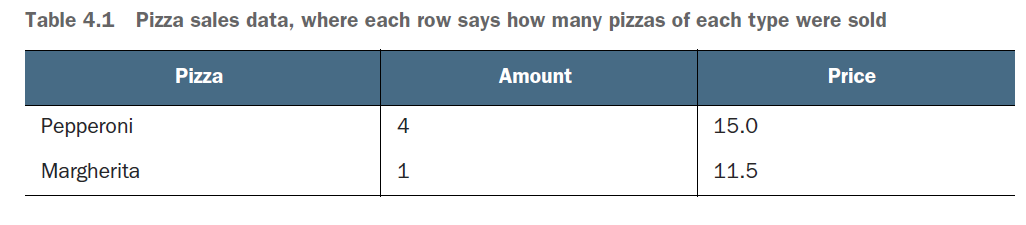
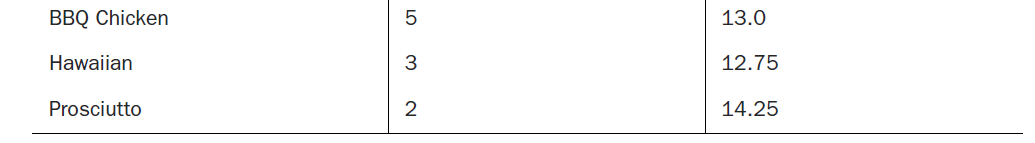

## Julia Arrays

In Julia, groups of related items are usually stored in arrays, tuples, or dictionaries. 

Julia, like most technical computing languages, provides a first-class array implementation. Most technical
computing languages pay a lot of attention to their array implementation at the expense of other containers.
Julia does not treat arrays in any special way. The array library is implemented almost completely in
Julia itself, and derives its performance from the compiler, just like any other code written in Julia. As such,
it's also possible to define custom array types by inheriting from `AbstractArray`.

An array is a collection of **objects** stored in a multi-dimensional grid:

* 0-dimensional Array is allowed
* 1-dimensional Array is alias as `Vector`
* 2-dimensional Array is alias as `Matrix`


In [ ]:
# Create a column vector
col = [4, 1, 5, 3, 2]

In [ ]:
# Create a row vector instead by separating each element with a space:
row = [4 1 5 3 2]

In [ ]:
# Create a 2 by 5 matrix
m = [1 1 1 1 1; 2 2 2 2 2]

In [ ]:
# Matrix -vector multiplication
m * col    # this works

In [ ]:
# Matrix -vector multiplication
col * m   # this doenn't work (why)

In [ ]:
v = [3 4]
v * m       # this works 1x2 matrix times 2x5 matrix

### Storing pizza sales

In [ ]:
amounts = [4, 1, 5, 3, 2]

In [ ]:
pizzas = [4 15.0;
1 11.5;
5 13.0;
3 12.75;
2 14.25]

In [ ]:
no_pizzas_sold = sum(amounts)

## Storing pizza data in tuples

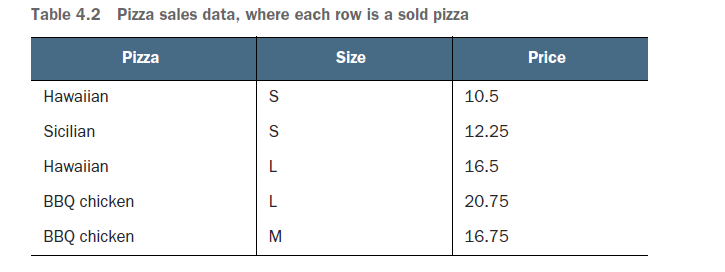


In [ ]:
pizza_tuple = ("hawaiian", 'S', 10.5) 

In [ ]:
sales = [
("hawaiian", 'S', 10.5),
("sicilian", 'S', 12.25),
("hawaiian", 'L', 16.5),
("bbq chicken", 'L', 20.75),
("bbq chicken", 'M', 16.75)
]

To make it easier to process pizza data, you will define accessor functions for different\properties. You will call the accessor for pizza size portion because Julia already has a function called size in the standard library:

In [ ]:
name(pizza) = pizza[1]
portion(pizza) = pizza[2]
price(pizza) = pizza[3]

In [ ]:
map(name, sales)

In [ ]:
map(portion, sales)

In [ ]:
map(price, sales)

In [ ]:
issmall(pizza) = portion(pizza) == 'S'
islarge(pizza) = portion(pizza) == 'L'
isbbq(pizza) = name(pizza) == "bbq chicken"

In [ ]:
filter(islarge, sales)

In [ ]:
# get the price of the large pizzas:
map(price, filter(islarge, sales))

In [ ]:
# money you made selling large pizzas:
sum(map(price, filter(islarge, sales)))

In [ ]:
# determine how much money was made selling BBQ chicken pizzas:
bbq_sales = filter(isbbq, sales)

In [ ]:
sum(map(price, bbq_sales))

In [ ]:
mapreduce(price, +, bbq_sales)

## sin implemented using the Taylor series

In [ ]:
function sine(x)
    n = 5
    total = 0
    for i in 0:n
        total += (-1)^i*x^(2i+1)/factorial(2i + 1)
    end
    total
end

In [ ]:
function sinus(x)
    n = 5
    taylor(i) = (-1)^i*x^(2i+1)/factorial(2i + 1)
    mapreduce(taylor, +, 0:n)
end

In [ ]:
sinus(0.5π)